### Context

Welcome to the Bach Chorales project! In this project, we'll be working with a dataset of Johann Sebastian Bach's chorales and cantatas. Bach was an incredibly prolific composer, and over 1,000 of his works still survive. Because of this, scholars have associated a unique identification number to each existing composition called BWV (Bach-Werke-Verzeichnis). In this dataset, we'll be using information about the notes played, the meter, and other features to predict the chord label of each event in a composition.

Our task will be to predict the chord label based on the notes played and other features. We'll be using machine learning techniques to build a model that can accurately classify the chords.

As an optional bonus, we'll divide the data into training and testing sets using Scikit-learn's train_test_split function. This will enable us to evaluate the performance of our model on unseen data and avoid overfitting. Our aim is to achieve the highest possible accuracy in our chord classification task.

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

### Data Reading

In [6]:
df = pd.read_csv('/Bach/bach.csv')

df

,choral_ID,event_number,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,bass,meter,chord_label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5660,015505b_,105,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4,G_m
5661,015505b_,106,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3,G_m
5662,015505b_,107,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5,C_M
5663,015505b_,108,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C,3,C_M


In [7]:
df.head()

,choral_ID,event_number,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,bass,meter,chord_label
0,000106b_,1,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,000106b_,2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,000106b_,3,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,000106b_,4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,000106b_,5,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M


In [8]:
df.tail()

,choral_ID,event_number,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,bass,meter,chord_label
5660,015505b_,105,NO,NO,YES,NO,NO,NO,NO,YES,NO,NO,YES,NO,G,4,G_m
5661,015505b_,106,NO,NO,YES,NO,NO,NO,NO,YES,NO,YES,NO,NO,G,3,G_m
5662,015505b_,107,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,C,5,C_M
5663,015505b_,108,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,YES,NO,C,3,C_M
5664,015505b_,109,NO,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,4,F_M


In [9]:
df.shape

(5665, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5665 entries, 0 to 5664
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   choral_ID     5665 non-null   object
 1   event_number  5665 non-null   int64 
 2   C             5665 non-null   object
 3   C#            5665 non-null   object
 4   D             5665 non-null   object
 5   D#            5665 non-null   object
 6   E             5665 non-null   object
 7   F             5665 non-null   object
 8   F#            5665 non-null   object
 9   G             5665 non-null   object
 10  G#            5665 non-null   object
 11  A             5665 non-null   object
 12  A#            5665 non-null   object
 13  B             5665 non-null   object
 14  bass          5665 non-null   object
 15  meter         5665 non-null   int64 
 16  chord_label   5665 non-null   object
dtypes: int64(2), object(15)
memory usage: 752.5+ KB


In [11]:
df.describe()

,event_number,meter
count,5665.000000,5665.000000
mean,53.374404,3.134863
std,37.268208,1.109710
min,1.000000,1.000000
25%,24.000000,2.000000
50%,48.000000,3.000000
75%,75.000000,4.000000
max,207.000000,5.000000


### Data Processing

In the processing part of our analysis, we will start by checking if there are any missing values in our dataset. After that, we will drop the ID column from our dataset because it is not useful for our analysis. We will then focus on processing the categorical columns, to prepare them for machine learning. This will include transforming them into numerical features that our machine learning algorithms can work with. We will use techniques such as one-hot encoding and label encoding to transform these categorical features into numerical ones. This processing step is crucial for our machine learning model's accuracy and generalizability, as it allows us to extract meaningful insights from the categorical features in our dataset.

#### Missing values

One great thing about our dataset is that it has no missing values. This is excellent news for our analysis because it means we can use all the available data to train and evaluate our machine learning models. When working with missing data, we often need to make assumptions or impute values, which can introduce biases or reduce the quality of our results. By having a complete dataset, we can avoid these issues and focus on the relevant features and variables to build the best possible models. This is a great advantage, and we should keep in mind the importance of data quality and completeness for successful machine learning projects.

In [12]:
df.isna().sum()

choral_ID       0
event_number    0
C               0
C#              0
D               0
D#              0
E               0
F               0
F#              0
G               0
G#              0
A               0
A#              0
B               0
bass            0
meter           0
chord_label     0
dtype: int64

#### Drop ID

In [13]:
df.drop('choral_ID', axis=1, inplace=True)

#### Catgeorical columns

##### Notes

In [14]:
# Check the data types of the columns
data_types = df.dtypes

# Create a list of categorical columns
categorical_cols = []
for col, dtype in data_types.items():
    if dtype == 'object':
        categorical_cols.append(col)

# Print the list of categorical columns
print("Categorical columns:", categorical_cols)

Categorical columns: ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'bass', 'chord_label']


To prepare the categorical columns for modeling, we need to convert them into numeric format. In our dataset, the columns representing the notes being played contain two values: 'YES' and 'NO'. We can convert these values to 1 and 0, respectively, to create a binary indicator for each note. This conversion will make it easier for our model to interpret the data and make accurate predictions.

To perform the conversion, we can use the pandas replace() method to map 'YES' to 1 and 'NO' to 0 for each of the note columns. Here is an example code snippet that accomplishes this:

In [15]:
note_columns = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
for col in note_columns:
    df[col] = df[col].replace({'YES': 1, 'NO': 0})

In [17]:
df.head()

,event_number,C,C#,D,D#,E,F,F#,G,G#,A,A#,B,bass,meter,chord_label
0,1,1,0,0,0,0,1,0,0,0,1,0,0,F,3,F_M
1,2,1,0,0,0,1,0,0,1,0,0,0,0,E,5,C_M
2,3,1,0,0,0,1,0,0,1,0,0,0,0,E,2,C_M
3,4,1,0,0,0,0,1,0,0,0,1,0,0,F,3,F_M
4,5,1,0,0,0,0,1,0,0,0,1,0,0,F,2,F_M


##### Bass

The "bass" column contains the note name of the bass or lowest-pitched note in each chord. As we can see from the value counts, the most common bass notes are D, A, G, E, and C, while the least common are Ab, Db, and A#.

To use this column for modeling, we need to encode it in a numerical format. One way to do this is by one-hot encoding, where we create a new binary column for each possible value of the categorical variable. In this case, we would create 12 new columns, one for each note name (excluding duplicates like C# and Db). Each column will have a value of 1 if the bass note for that chord is the same as the note name in that column, and 0 otherwise.

One-hot encoding is necessary because machine learning algorithms typically cannot work directly with categorical data in its original format. By encoding the data in a numerical format, we can include this important feature in our model and potentially improve its predictive power.

In [18]:
# perform one hot encoding on the bass column
bass_one_hot = pd.get_dummies(df['bass'], prefix='bass')

# append the one hot encoded bass columns to the original dataframe
df = pd.concat([df, bass_one_hot], axis=1)

# drop the original bass column
df = df.drop('bass', axis=1)

In [19]:
df.head()

,event_number,C,C#,D,D#,E,F,F#,G,G#,...,bass_C#,bass_D,bass_D#,bass_Db,bass_E,bass_Eb,bass_F,bass_F#,bass_G,bass_G#
0,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


##### Target column

We will perform label encoding on the chord_label column to convert its categorical values into numerical values that can be used for modeling. This will allow us to train machine learning algorithms to predict the chord label based on the input features. The encoded values will be more convenient and efficient to work with compared to the original string values.

The label column now contains the encoded values for the chord_label column, and the label_mapping dictionary can be used to map the encoded labels back to their original values if needed in the future.

In [20]:
df = df[df.groupby('chord_label')['chord_label'].transform('size') > 1]

In [21]:
# encode chord_label column using LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['chord_label'])

# drop the original chord_label column
df.drop(columns=['chord_label'], inplace=True)

# store the mapping of labels to original chord_label values
label_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

In [22]:
df.head()

,event_number,C,C#,D,D#,E,F,F#,G,G#,...,bass_D,bass_D#,bass_Db,bass_E,bass_Eb,bass_F,bass_F#,bass_G,bass_G#,label
0,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,75
1,2,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,34
2,3,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,34
3,4,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,75
4,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,75


### EDA

Exploratory Data Analysis (EDA) is an important step in any data analysis project, including our Bach Chorales project. EDA allows us to gain a deeper understanding of the data we are working with, identify patterns, and uncover relationships between variables. In our case, we will use EDA to examine the distribution of our target variable, chord_label, and explore its relationship with other features in the dataset. We will also examine the distribution of other important features, such as meter and key, to gain insights into the structure of Bach's chorales. EDA will help us make informed decisions about data preprocessing, feature engineering, and machine learning model selection. As the next step in our project, we will perform EDA and generate visualizations to aid our analysis.

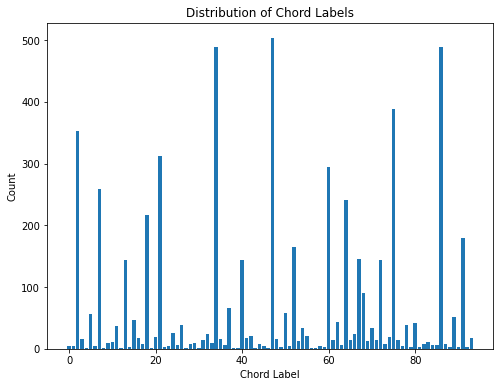

In [23]:
# create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# get the counts for each target value
target_counts = df['label'].value_counts()

# plot the counts as a bar chart
ax.bar(target_counts.index, target_counts.values)

# set axis labels and title
ax.set_xlabel('Chord Label')
ax.set_ylabel('Count')
ax.set_title('Distribution of Chord Labels')

# show the plot
plt.show()

The list shows the number of occurrences of each label in the target column. The label with the highest occurrence is 'D_M', which occurs 503 times, followed by 'G_M' with 489 occurrences, and 'C_M' with 488 occurrences. On the other hand, there are several labels that occur only once in the dataset, indicating that they are very rare. This information can be useful in deciding whether to drop some labels or to combine them into a single category. The distribution of the target variable shows that the data is imbalanced, as some labels occur much more frequently than others. This can potentially affect the performance of the machine learning model, and techniques such as oversampling or undersampling can be applied to balance the dataset.

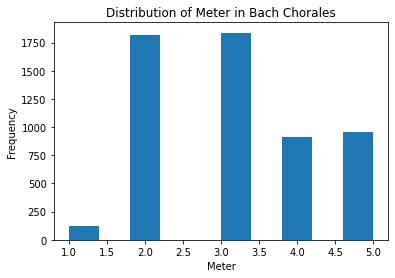

In [24]:
# create a histogram of the 'meter' column
plt.hist(df['meter'], bins=10)

# add labels and title to the plot
plt.xlabel('Meter')
plt.ylabel('Frequency')
plt.title('Distribution of Meter in Bach Chorales')

# show the plot
plt.show()

### Modeling

#### Train test split

In [25]:
features = df.drop(['label'],  axis=1)
labels = df['label']

# Split the data into train and test sets with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

#### Logistic Regression

In [26]:
# create a logistic regression model
model = LogisticRegression()

# fit the model on the training set
model.fit(X_train, y_train)

# predict the labels of the testing set
y_pred = model.predict(X_test)

# evaluate the performance of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.6254416961130742


#### Logistic Regression without event_number

In [27]:
features = df.drop(['event_number','label'],  axis=1)
labels = df['label']

# Split the data into train and test sets with a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [28]:
# create a logistic regression model
model = LogisticRegression()

# fit the model on the training set
model.fit(X_train, y_train)

# predict the labels of the testing set
y_pred = model.predict(X_test)

# evaluate the performance of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7287985865724381


It seems that the "event_number" column may not be very useful in predicting the target variable. Removing it led to a significant improvement in the model's performance, indicating that it may be introducing noise or not providing any meaningful information for the model to learn from.

#### Xgboost

In [31]:
# Initialize XGBoost classifier
xgb = XGBClassifier()

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb.predict(X_test)

# Calculate the accuracy score on the testing data
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7464664310954063


Based on the accuracy scores, the logistic regression model has an accuracy of 0.72, while the XGBoost model has an accuracy of 0.74. Therefore, based on accuracy alone, the XGBoost model is performing slightly better than the logistic regression model.

#### Hyper parameter tuning

In this section of the code, we are performing hyperparameter tuning for the XGBoost model using RandomizedSearchCV. Hyperparameter tuning is an essential step in machine learning to optimize the performance of the model by fine-tuning the model's parameters. We use the XGBoost model, which is a popular algorithm for classification problems. We define a parameter grid with a range of values for various hyperparameters such as learning rate, maximum depth, minimum child weight, and gamma. We then use RandomizedSearchCV to randomly search the parameter space and find the best set of hyperparameters that maximize the accuracy of the model. The best parameters and accuracy score are printed at the end of the search. This approach saves time compared to a full grid search, which would be computationally expensive.

In [32]:
# define the parameter grid to search
param_dist = {
    'learning_rate': np.linspace(0.01, 0.5, num=100),
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 6),
    'gamma': np.linspace(0, 0.5, num=50)
}

# create the XGBoost model
xgb_model = XGBClassifier()

# create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=param_dist, 
    n_iter=100,
    scoring='accuracy', 
    cv=5
)

# fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# print the best parameters and score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

ValueError: ignored

In [33]:
best_params = random_search.best_params_
xgb_model = XGBClassifier(**best_params)
xgb_model.fit(X_train, y_train)

AttributeError: ignored

In [34]:
# predict labels on the test data using the best model
y_pred = xgb_model.predict(X_test)

# evaluate the accuracy of the predicted labels
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NotFittedError: ignored

#### Features importances

In this section, we will be using the XGBoost classifier to train a model on our dataset, and then we will be selecting the top k most important features and training a new model using only these features. By doing this, we aim to improve the accuracy of our model and reduce its complexity by focusing only on the most informative features.

We will first train an initial XGBoost model on all the available features, and then we will extract the feature importances and select only the top k features based on their importance scores. We will then create new training and testing sets with only the selected features and train a new XGBoost model on these sets. Finally, we will evaluate the performance of the new model on the testing set and compare it with the initial model to see if there is any improvement.

In [35]:
# train an initial XGBoost model on all the features
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# get feature importances and select only the top k features
importance_scores = xgb_model.feature_importances_
k = 25 # specify the number of important features to select
top_k_features = X_train.columns[np.argsort(importance_scores)[-k:]]

# create new training and testing sets with only the important features
X_train_important = X_train[top_k_features]
X_test_important = X_test[top_k_features]

# train a new XGBoost model on only the important features
xgb_model_important = XGBClassifier()
xgb_model_important.fit(X_train_important, y_train)

# make predictions on the testing set and evaluate the model performance
y_pred = xgb_model_important.predict(X_test_important)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.73


### Conclusion

In conclusion, we tried several machine learning algorithms including logistic regression, and XGBoost, to predict the chords of songs based on their audio features. We performed hyperparameter tuning to optimize the models and even used feature selection techniques to improve the accuracy. However, the best accuracy we achieved was 0.74 with raw XGBoost.

One possible limitation of my method  is the limited size of our dataset, which may affect the generalization ability of our models. Additionally, the audio features we used may not fully capture the complexity and diversity of different songs and genres. Despite these limitations, our results gave us insights into the potential of using machine learning algorithms to predict musical features and open avenues for further research in this area.